In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import gc
import cv2

In [4]:
digits=pd.read_csv('train.csv')
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
four = digits.iloc[3, 1:]
four.shape

(784,)

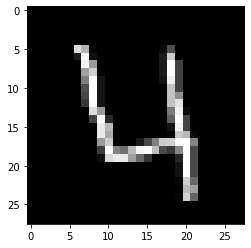

In [22]:
four = four.values.reshape(28, 28)
plt.imshow(four, cmap='gray')

In [23]:
print(four[5:-5, 5:-5])

[[  0 220 179   6   0   0   0   0   0   0   0   0   9  77   0   0   0   0]
 [  0  28 247  17   0   0   0   0   0   0   0   0  27 202   0   0   0   0]
 [  0   0 242 155   0   0   0   0   0   0   0   0  27 254  63   0   0   0]
 [  0   0 160 207   6   0   0   0   0   0   0   0  27 254  65   0   0   0]
 [  0   0 127 254  21   0   0   0   0   0   0   0  20 239  65   0   0   0]
 [  0   0  77 254  21   0   0   0   0   0   0   0   0 195  65   0   0   0]
 [  0   0  70 254  21   0   0   0   0   0   0   0   0 195 142   0   0   0]
 [  0   0  56 251  21   0   0   0   0   0   0   0   0 195 227   0   0   0]
 [  0   0   0 222 153   5   0   0   0   0   0   0   0 120 240  13   0   0]
 [  0   0   0  67 251  40   0   0   0   0   0   0   0  94 255  69   0   0]
 [  0   0   0   0 234 184   0   0   0   0   0   0   0  19 245  69   0   0]
 [  0   0   0   0 234 169   0   0   0   0   0   0   0   3 199 182  10   0]
 [  0   0   0   0 154 205   4   0   0  26  72 128 203 208 254 254 131   0]
 [  0   0   0   0  61 254

In [24]:
digits.label.astype('category').value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [26]:
100*(round(digits.label.astype('category').value_counts()/len(digits.index),4))

1    11.15
7    10.48
3    10.36
9     9.97
2     9.95
6     9.85
0     9.84
4     9.70
8     9.67
5     9.04
Name: label, dtype: float64

In [27]:
digits.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [28]:
digits.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [29]:
X=digits.iloc[:, 1:]
y=digits.iloc[:, 0]

from sklearn.preprocessing import scale
X=scale(X)

X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.1,random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4200, 784)
(37800, 784)
(4200,)
(37800,)


In [32]:
from sklearn import svm, metrics
svm_linear=svm.SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [33]:
predictions=svm_linear.predict(X_test)
predictions[:10]

array([1, 3, 0, 0, 1, 9, 1, 5, 0, 6], dtype=int64)

In [34]:
confusion=metrics.confusion_matrix(y_true=y_test, y_pred=predictions)
confusion

array([[3615,    0,   12,    8,    8,   28,   28,    5,    9,    2],
       [   0, 4089,   16,   23,    9,    3,    3,   13,   25,    4],
       [  54,   48, 3363,   64,   74,   13,   53,   52,   59,   10],
       [  20,   28,  121, 3387,    8,  175,    5,   54,   58,   44],
       [  12,   12,   26,    2, 3399,    7,   41,   41,    4,  158],
       [  49,   42,   32,  177,   41, 2899,   54,   14,   82,   28],
       [  36,   16,   55,    5,   34,   37, 3486,    3,   21,    0],
       [   9,   27,   37,   22,   70,   10,    4, 3619,   14,  142],
       [  26,   86,   71,  137,   24,  137,   29,   26, 3096,   33],
       [  38,   11,   39,   26,  182,   19,    1,  207,   27, 3228]],
      dtype=int64)

In [35]:
metrics.accuracy_score(y_true=y_test, y_pred=predictions)

0.9042592592592592

In [38]:
class_wise=metrics.classification_report(y_true=y_test, y_pred=predictions)
class_wise

'              precision    recall  f1-score   support\n\n           0       0.94      0.97      0.95      3715\n           1       0.94      0.98      0.96      4185\n           2       0.89      0.89      0.89      3790\n           3       0.88      0.87      0.87      3900\n           4       0.88      0.92      0.90      3702\n           5       0.87      0.85      0.86      3418\n           6       0.94      0.94      0.94      3693\n           7       0.90      0.92      0.91      3954\n           8       0.91      0.84      0.88      3665\n           9       0.88      0.85      0.87      3778\n\n    accuracy                           0.90     37800\n   macro avg       0.90      0.90      0.90     37800\nweighted avg       0.90      0.90      0.90     37800\n'

In [39]:
gc.collect()

237

In [40]:
svm_rbf=svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

SVC()

In [41]:
predictions=svm_rbf.predict(X_test)
print(metrics.accuracy_score(y_true=y_test, y_pred=predictions))

0.9250793650793651


In [42]:
from sklearn.model_selection import GridSearchCV

parameters={'C':[1,10,100], 'gamma':[1e-2, 1e-3, 1e-4]}
svc_grid_search=svm.SVC(kernel='rbf')
clf=GridSearchCV(svc_grid_search, param_grid=parameters, scoring='accuracy')
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]},
             scoring='accuracy')

In [43]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,26.196127,1.797040,3.283137,0.206382,1,0.01,"{'C': 1, 'gamma': 0.01}",0.719048,0.759524,0.686905,0.733333,0.726190,0.725000,0.023450,9
1,8.761154,0.643917,2.272662,0.076083,1,0.001,"{'C': 1, 'gamma': 0.001}",0.925000,0.921429,0.908333,0.911905,0.923810,0.918095,0.006709,3
2,13.334270,1.179292,3.310476,0.267007,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.876190,0.884524,0.866667,0.873810,0.883333,0.876905,0.006547,6
3,27.015710,1.144604,3.385009,0.057459,10,0.01,"{'C': 10, 'gamma': 0.01}",0.733333,0.775000,0.709524,0.746429,0.744048,0.741667,0.021176,7
4,10.929726,3.013898,3.641001,1.269688,10,0.001,"{'C': 10, 'gamma': 0.001}",0.941667,0.927381,0.915476,0.910714,0.930952,0.925238,0.011076,1
5,6.666396,0.176154,2.217460,0.023500,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.921429,0.925000,0.900000,0.910714,0.920238,0.915476,0.009066,4
6,30.960723,0.216226,3.945425,0.028127,100,0.01,"{'C': 100, 'gamma': 0.01}",0.733333,0.775000,0.709524,0.746429,0.744048,0.741667,0.021176,7
7,8.341995,0.109297,2.393456,0.045143,100,0.001,"{'C': 100, 'gamma': 0.001}",0.938095,0.929762,0.914286,0.908333,0.929762,0.924048,0.010999,2
8,4.964216,0.476814,1.797639,0.103664,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.908333,0.920238,0.886905,0.890476,0.923810,0.905952,0.015040,5


In [45]:
best_score=clf.best_score_
best_hyperparams=clf.best_params_
print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9252380952380952 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


In [48]:
model = svm.SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9318783068783069 

[[3615    0   10   12    4   12   38   11   11    2]
 [   0 4107   13   18    6    2    5   21    8    5]
 [  30   20 3438   60   37    4   37  112   41   11]
 [   8    9   92 3547    5   88    6   71   44   30]
 [   4   10   32    5 3460   11   33   46    3   98]
 [  22   21   12  114   20 3059   62   50   31   27]
 [  27    7   11    1    9   27 3548   47   16    0]
 [   5   22   21   11   49    4    2 3749   10   81]
 [  10   37   47   79   21   82   25   49 3290   25]
 [  15    7   18   28   97   12    0  174   15 3412]] 

